<center><h2>ToAI - Class C - Final Project:</h2></center>
<center><h1>Loan Default Prediction (part of SEB Big Data Challenge)</h1></center>

<img src="./assets/toai.png" style="width: 20rem; background: black;"/>
<img src="./assets/lfma-nariai-seb-bankas.jpg" style="width: 20rem"/>

## Table of contents:
0. [Prerquisites;](#prerequisites)
1. [Acquisition;](#acquisition)
2. [Exploration & Preprocessing;](#exploration-preprocessing)
3. [Analysis & Interpretation.](#analysis)

## To do:
- Complete function that shows distributions;
- Implement the following models:
  - XGBoost model;
  - CatBoost model;
  - Light GBM model;
- Try creating an ensemble of succesful models;

<br>

## <a id="prerequisites">1. Prerequisites:</a>

In [1]:
# Packages:

from cornelia.imports import *
from cornelia.helpers import display_opts
from cornelia.extraction import read_feather, pickle_obj, unpickle_obj
from cornelia.preprocessing import match_cols, drop_cols, fill_NAs, one_hot_encode, category_encode, split_df
from cornelia.visualization import print_missing_data, print_descriptive_stats, print_categories, plot_data, print_df
from cornelia.analysis import score_regr, score_class, feature_importance, confidence, similiar_features, score_with_cols_dropped, pdps

from sklearn.ensemble import RandomForestClassifier

import json

# Options:

%matplotlib inline
%load_ext autoreload
%autoreload 2

display_opts(decimal_numbers=2,
             max_rows=1000,
             max_cols=30)

## <a id="acquisition">1. Acquisition</a>

In [3]:
# Load raw data:

raw_train_df = read_feather(filename="raw_df_with_additional_features.f")
raw_test_df = read_feather(filename="test_df.f")

,id,y,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies,years_current_job,monthly_debt,years_credit_history,months_since_last_delinquent,open_accounts,credit_problems,credit_balance,max_open_credit
0,1000001,1,387574,short,None,debt_consolidation,nan,mortgage,1.00,10.00,20090.79,12,nan,10,1,242649,440440.00
1,1000002,0,72512,short,good,debt_consolidation,190798.00,rent,0.00,2.00,1460.91,6,nan,3,0,55062,129998.00
2,1000003,0,217404,short,good,debt_consolidation,1220313.00,mortgage,0.00,8.00,18293.39,10,nan,19,0,467514,513568.00
3,1000004,0,99999999,long,good,debt_consolidation,1435545.00,own,0.00,0.00,14312.70,18,27.00,7,0,157814,184140.00
4,1000005,1,215974,short,good,debt_consolidation,679250.00,rent,0.00,3.00,16464.45,14,53.00,6,0,216125,257840.00


,id,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies,years_current_job,monthly_debt,years_credit_history,months_since_last_delinquent,open_accounts,credit_problems,credit_balance,max_open_credit
0,1,438812,short,fair,debt_consolidation,1421010.00,mortgage,0.00,10.00,28595.95,21,nan,11,0,599545,826034
1,2,278344,long,None,debt_consolidation,723216.00,mortgage,0.00,0.00,15784.63,16,nan,9,0,271225,449504
2,3,155716,short,very_good,home_improvements,1956316.00,mortgage,0.00,8.00,21586.85,27,nan,12,0,28709,314468
3,4,442992,long,good,debt_consolidation,1339177.00,mortgage,0.00,10.00,23030.28,17,nan,7,0,766878,982234
4,5,412346,long,None,debt_consolidation,nan,mortgage,0.00,6.00,24058.94,10,68.00,11,0,524001,620950


## <a id="exploration-preprocessing">2. Exploration and Preprocessing:</a>

In [4]:
# Match columns:

raw_train_df = match_cols(df1=raw_train_df,
                          df2=raw_test_df,
                          omit=["y"])

No columns removed.


,id,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies,years_current_job,monthly_debt,years_credit_history,months_since_last_delinquent,open_accounts,credit_problems,credit_balance,max_open_credit,y
0,1000001,387574,short,None,debt_consolidation,nan,mortgage,1.00,10.00,20090.79,12,nan,10,1,242649,440440.00,1
1,1000002,72512,short,good,debt_consolidation,190798.00,rent,0.00,2.00,1460.91,6,nan,3,0,55062,129998.00,0
2,1000003,217404,short,good,debt_consolidation,1220313.00,mortgage,0.00,8.00,18293.39,10,nan,19,0,467514,513568.00,0
3,1000004,99999999,long,good,debt_consolidation,1435545.00,own,0.00,0.00,14312.70,18,27.00,7,0,157814,184140.00,0
4,1000005,215974,short,good,debt_consolidation,679250.00,rent,0.00,3.00,16464.45,14,53.00,6,0,216125,257840.00,1


In [5]:
# Observe missing data:

print_missing_data(dfs=[raw_train_df, raw_test_df],
                   labels=["train", "test"])

,Missing values in train (%),Missing values in test (%)
feature_name,,
id,0.00,0.00
amount_current_loan,0.00,0.00
term,0.00,0.00
credit_score,22.93,23.88
loan_purpose,0.00,0.00
yearly_income,18.89,19.47
home_ownership,0.00,0.00
bankruptcies,0.18,0.17
years_current_job,4.18,3.53


In [6]:
# Descriptive stats:

print_descriptive_stats(dfs=[raw_train_df, raw_test_df],
                        labels=["train", "test"])

,count,mean,std,min,25%,50%,75%,max
amount_current_loan (test),10000.00,11794868.60,31829206.38,21472.00,178238.50,310695.00,523094.00,99999999.00
amount_current_loan (train),9000000.00,13038047.72,33267502.46,10802.00,180268.00,316360.00,536184.00,99999999.00
bankruptcies (test),9983.00,0.12,0.35,0.00,0.00,0.00,0.00,5.00
bankruptcies (train),8983451.00,0.12,0.35,0.00,0.00,0.00,0.00,7.00
credit_balance (test),10000.00,292058.10,348668.55,0.00,111824.50,206824.50,362615.00,7225415.00
credit_balance (train),9000000.00,297664.97,376019.74,0.00,113278.00,210786.00,370804.00,32878968.00
credit_problems (test),10000.00,0.17,0.47,0.00,0.00,0.00,0.00,9.00
credit_problems (train),9000000.00,0.17,0.49,0.00,0.00,0.00,0.00,15.00
id (test),10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
id (train),9000000.00,5500000.50,2598076.36,1000001.00,3250000.75,5500000.50,7750000.25,10000000.00


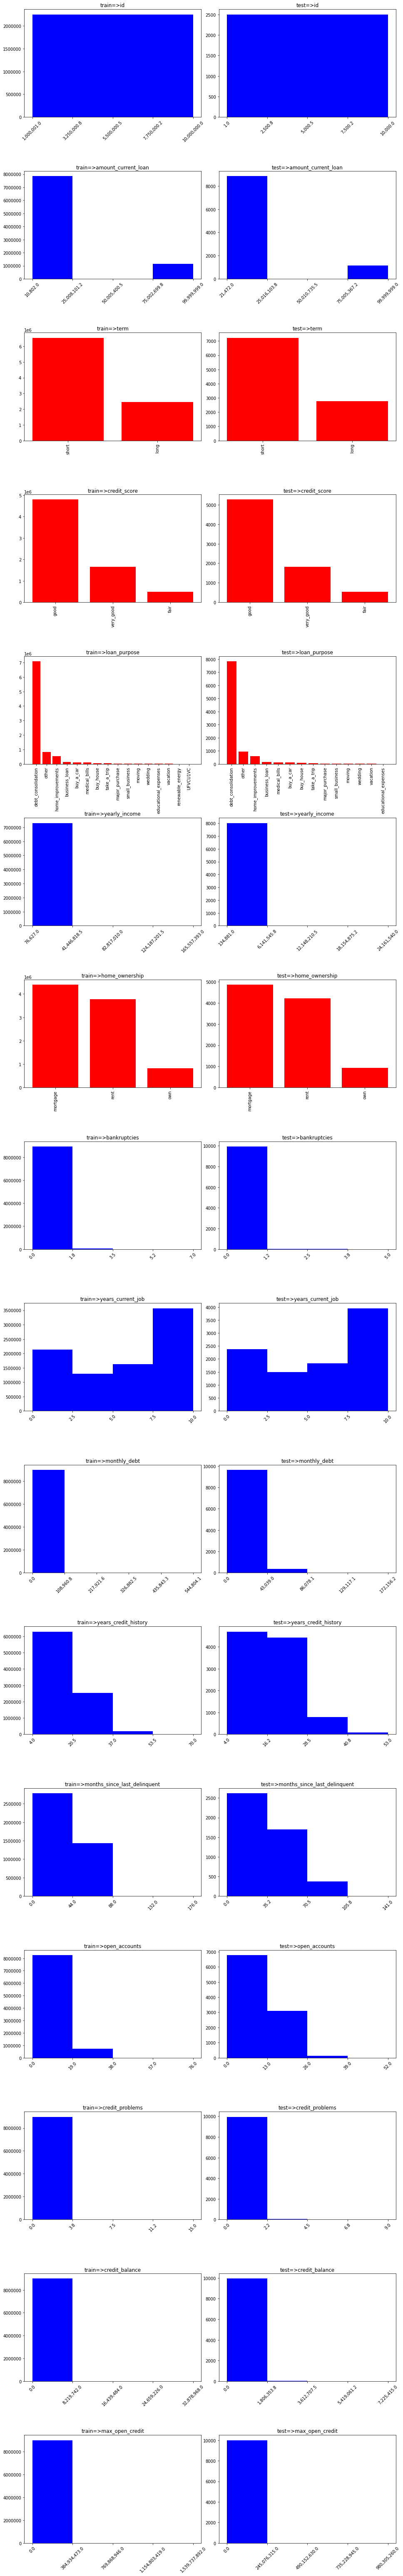

In [7]:
# Print histograms:
    
plot_data(dfs=[raw_train_df, raw_test_df],
          labels=["train", "test"],
          bench=1,
          n_bins=4)

In [8]:
# Drop a single row with an obfuscated feature:

raw_train_df = raw_train_df[raw_train_df["loan_purpose"] != "UFVCU1VC"]

In [9]:
# Backup data:

pickle_obj([raw_train_df, raw_test_df], "train_test_dfs")

Object saved @ ./tmp/train_test_dfs.pkl


## <a id="analysis">3. Analysis & Interpretation:</a>

In [4]:
# Unbackup data:

raw_train_df, raw_test_df = unpickle_obj("train_test_dfs")

### 3.1. Iteration #1 - initial run & interpretation (random forest)

In [6]:
# Fill NaNs:

train_df, test_df = fill_NAs(dfs=[raw_train_df, raw_test_df],
                                  omit=["y"],
                                  num_method="median",
                                  cat_method="mode",
                                  was_missing=True)

Done.


In [7]:
# One Hot Encode categorical columns:

train_df, test_df = one_hot_encode(dfs=[train_df, test_df],
                                   card_thresh=15)

Done.


In [8]:
# Split to train and validation:

train_X, train_y, valid_X, valid_y = split_df(df=train_df,
                                              target="y",
                                              train_p=0.90)

8999999 rows shuffled in df No.1.
Shapes of the outputs: (8099999, 51) (8099999,) (900000, 51) (900000,)


In [ ]:
# Train model:

m = RandomForestClassifier(n_estimators=50,
                           max_samples=100_000,
                           max_features=0.75,
                           min_samples_leaf=3,
                           n_jobs=-1)

m.fit(train_X, train_y)

# Backup model:

# pickle_obj(m, "model_1")
m = unpickle_obj("model_1")

# Print score:

score_class(m, train_X, train_y, valid_X, valid_y)

In [ ]:
# Feature importance:

fi_cols_to_drop = feature_importance(m=m,
                                     df=train_X,
                                     print_rows=15,
                                     to_keep_threshold=0.01)

# Backup feature importance result:

pickle_obj(fi_cols_to_drop, "fi_cols_to_drop")

In [ ]:
# Confidence of predictions for each feature and it's each category:

confidence(model=m,
           df=valid_X,
           n_bins=5)

In [ ]:
# Find similiar features:

similiar_features(train_X[[c for c in train_X.columns if c not in fi_cols_to_drop]])

In [ ]:
# Check if dropping any of colinear feature will impact score:

potentially_colinear_features = ["yearly_income=>was_missing",
                                 "credit_score=>was_missing",
                                 "max_open_credit",
                                 "credit_balance",
                                 "monthly_debt",
                                 "yearly_income"]

In [ ]:
# Assign safe to drop features to another variable:

colin_cols_to_drop = ["yearly_income=>was_missing", "max_open_credit", "credit_balance"]

# Backup feature importance result:

pickle_obj(colin_cols_to_drop, "colin_cols_to_drop")

In [ ]:
# Actual relationship between independant and dependant features (partial dependance):

pdps(model=m,
          data=train_X.sample(10_000),
          target="y",
          omit=fi_cols_to_drop + colin_cols_to_drop,
          clusters=5)


### 3.2. Iteration #2 - XGBoost model